<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/9%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')

X = df[['Open', 'Close', 'High', 'Low']].values
y = df['Volume'].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2956, 4)
Shape of y: (2956, 1)


In [11]:
# 2. 정규화 (Scaling)
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

print("Shape of scaled X:", X_scaled.shape)
print("Shape of scaled y:", y_scaled.shape)

Shape of scaled X: (2956, 4)
Shape of scaled y: (2956, 1)


In [12]:
# 3. 시퀀스 생성
# Create sequences for features (X) and corresponding target (y)
window = 12   # Use the previous 12 data points to predict the next
X_sequences, y_sequences = [], []
for i in range(len(X_scaled) - window):
    X_sequences.append(X_scaled[i : i + window])
    y_sequences.append(y_scaled[i + window])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

print("Shape of X sequences:", X_sequences.shape)
print("Shape of y sequences:", y_sequences.shape)

Shape of X sequences: (2944, 12, 4)
Shape of y sequences: (2944, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)

Shape of X_train: (2355, 12, 4)
Shape of X_test: (589, 12, 4)
Shape of y_train: (2355, 1)
Shape of y_test: (589, 1)


In [25]:
# 5. RNN 모델 구축
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(X_sequences.shape[1], X_sequences.shape[2])), # Corrected input_shape
    tf.keras.layers.SimpleRNN(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 12, 50)         │         2,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 6. RNN 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0199 - val_loss: 0.0066
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0055 - val_loss: 0.0066
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0058 - val_loss: 0.0078
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0062 - val_loss: 0.0075
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0053 - val_loss: 0.0074
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 10/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 11/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0060 - val_loss: 0.0066
Epoch 12/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 1

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


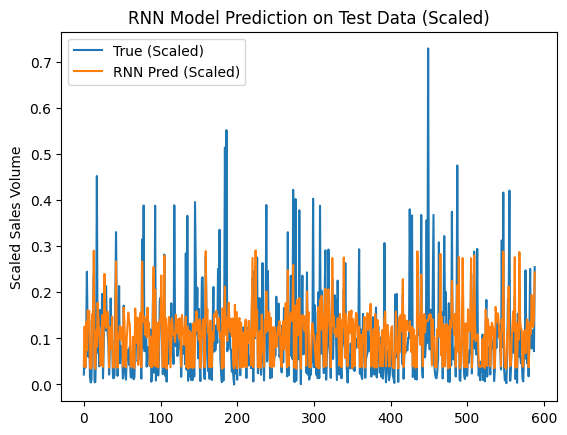

In [36]:
# 7. RNN 모델 예측 및 시각화 (테스트 데이터 사용) - 정규화된 데이터 스케일
pred_rnn = model.predict(X_test)
plt.plot(y_test, label='True (Scaled)')
plt.plot(pred_rnn, label='RNN Pred (Scaled)')
plt.legend(); plt.title('RNN Model Prediction on Test Data (Scaled)'); plt.ylabel('Scaled Sales Volume'); plt.show()

In [28]:
# 4. LSTM 모델 구축 및 훈련
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=64, input_shape=(X_sequences.shape[1], X_sequences.shape[2])), # Corrected input_shape for LSTM
    tf.keras.layers.Dense(units=1)
])

modelLSTM.compile(optimizer='adam', loss='mse')

# Train the LSTM model
history_lstm = modelLSTM.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0096 - val_loss: 0.0078
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056 - val_loss: 0.0067
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 9/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 10/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 11/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 12/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss:

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


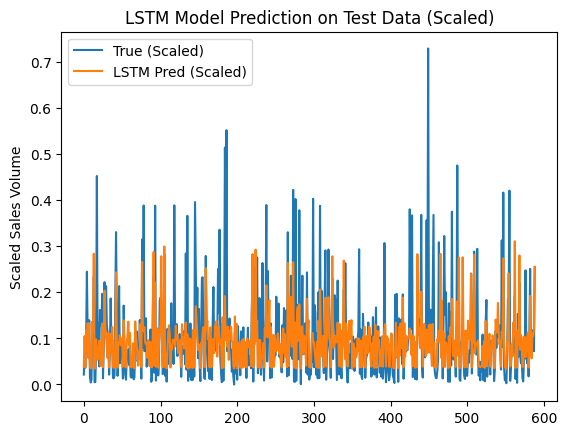

In [37]:
# 7. LSTM 모델 예측 및 시각화 (테스트 데이터 사용) - 정규화된 데이터 스케일
pred_lstm = modelLSTM.predict(X_test)
plt.plot(y_test, label='True (Scaled)')
plt.plot(pred_lstm, label='LSTM Pred (Scaled)')
plt.legend(); plt.title('LSTM Model Prediction on Test Data (Scaled)'); plt.ylabel('Scaled Sales Volume'); plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RNN 모델 MSE 및 RMSE 계산 (정규화된 데이터 사용)
mse_rnn_scaled = mean_squared_error(y_test, model.predict(X_test))
rmse_rnn_scaled = np.sqrt(mse_rnn_scaled)
print(f"RNN 모델의 MSE (정규화된 데이터): {mse_rnn_scaled}")
print(f"RNN 모델의 RMSE (정규화된 데이터): {rmse_rnn_scaled}")

# LSTM 모델 MSE 및 RMSE 계산 (정규화된 데이터 사용)
mse_lstm_scaled = mean_squared_error(y_test, modelLSTM.predict(X_test))
rmse_lstm_scaled = np.sqrt(mse_lstm_scaled)
print(f"LSTM 모델의 MSE (정규화된 데이터): {mse_lstm_scaled}")
print(f"LSTM 모델의 RMSE (정규화된 데이터): {rmse_lstm_scaled}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RNN 모델의 MSE (정규화된 데이터): 0.006542450032805185
RNN 모델의 RMSE (정규화된 데이터): 0.08088541297913478
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM 모델의 MSE (정규화된 데이터): 0.006415335594625287
LSTM 모델의 RMSE (정규화된 데이터): 0.08009579011799114
